In [1]:
import matplotlib.pyplot as plt #For plotting our visualizations
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
from PIL import Image

# Constants

In [2]:
image_size = (480, 640)

<hr>

# Load dataset

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "../Data/Original/ds1/Train/",
    image_size=image_size,
    seed=1234,
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "../Data/Original/ds1/Test/",
    image_size=image_size,
    seed=1234,
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    "../Data/Original/ds1/Validation/",
    image_size=image_size,
    seed=1234,
)
class_names = train_ds.class_names

Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


## preview data

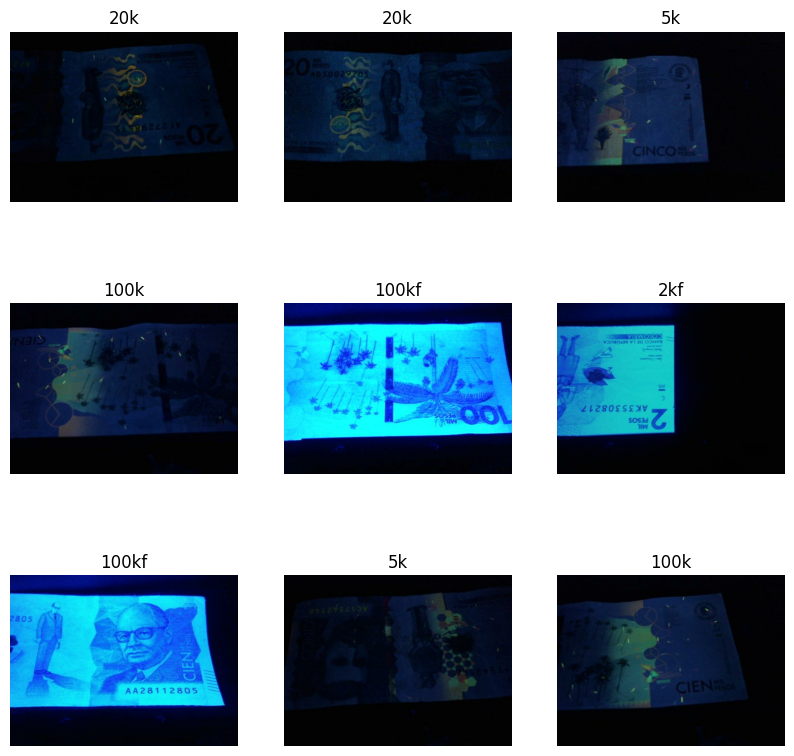

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

## Standardize the data

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [6]:
normalized_ds = train_ds.map(lambda xx, yy: (normalization_layer(xx), yy))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.8313726


## Allow caching for performance

In [7]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(class_names))
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=3
)

Epoch 1/5
390/390 [==============================] - 703s 2s/step - loss: 0.7169 - accuracy: 0.7463 - val_loss: 0.1215 - val_accuracy: 0.9649
Epoch 2/5
390/390 [==============================] - 715s 2s/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0275 - val_accuracy: 0.9916
Epoch 3/5
390/390 [==============================] - 731s 2s/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 4/5
390/390 [==============================] - 721s 2s/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.2153 - val_accuracy: 0.9389
Epoch 5/5
390/390 [==============================] - 719s 2s/step - loss: 0.0363 - accuracy: 0.9895 - val_loss: 0.0227 - val_accuracy: 0.9918
